In [201]:
#import twitteR and stringr for API access and text manipulation
library(twitteR)
library(stringr)
library(ggplot2)
library(httr)
library(rjson)
library(tm)
library(gridExtra)
library(lubridate)
library(SnowballC)

In [202]:
#search twitter API for boolean string
#search twitter for boolean phrase
#setup_twitter_oauth(consumer_key, consumer_secret, access_token=NULL, access_secret=NULL)

setup_twitter_oauth("7StWFQlriMB0PWrp7MhrrYiid", "5FPZAdE7xCsO0jHzBBpgJOX5GeqQvhmGyUwFc8zX1iTlKflJDd",
                    "2808413395-7T0aDBeaVlGrgS5PJepbnybxWbTIdYd0ajn6KH4", "EApjA21qAyzwTiO5lrk0ti9Zk6MYhJqsxCHz8nPHh1A2n")

#Extract tweets from a single user at a time   

clinton_tweets <- userTimeline(user = "@HillaryClinton",
                               n = 200, includeRts = FALSE, retryOnRateLimit = 2000)
trump_tweets <- userTimeline(user = "@realDonaldTrump",
                             n = 200, includeRts = FALSE, retryOnRateLimit = 2000)  

# clinton_tweets$text <- sapply(clinton_tweets$text,function(row) iconv(row, "latin1", "ASCII", sub=""))
# trump_tweets$text <- sapply(trump_tweets$text,function(row) iconv(row, "latin1", "ASCII", sub=""))

#Put the tweets downloaded into a data.frame
clinton_tweets <- twListToDF(clinton_tweets)
trump_tweets <- twListToDF(trump_tweets)

Encoding(clinton_tweets$text) <- "UTF-8"
Encoding(trump_tweets$text) <- "UTF-8"


clinton_tweets$text <- sapply(clinton_tweets$text,function(row) iconv(row, "latin1", "ASCII", sub=""))
trump_tweets$text <- sapply(trump_tweets$text,function(row) iconv(row, "latin1", "ASCII", sub=""))

# The tweets are now easier to work with. 
# The next step is removing all the so-called “stopwords”(words that do not add meaning to the topic), 
# and convert the text into a Term Document Matrix. 
# The TDM is then summed up so we get a data.frame of words arranged by how often they are used:

[1] "Using direct authentication"


In [203]:
textScrubber <- function(dataframe) {   
  dataframe$text <-  gsub("http\\S+", "", dataframe$text)
  dataframe$text <-  gsub(":", "", dataframe$text)
  dataframe$text <-  gsub("!", "", dataframe$text)
  dataframe$text <-  tolower(dataframe$text)
  return(dataframe)
}

In [204]:
## Scrub for http and lowercase
clinton_tweets <- textScrubber(clinton_tweets)
trump_tweets <- textScrubber(trump_tweets)

In [205]:
head(clinton_tweets,10)

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
help rangers protect the elephants. go to #earthday #tribeca2017,FALSE,17701,NA,2017-04-23 00:43:16,FALSE,NA,855945131677159424,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HillaryClinton,4972,FALSE,FALSE,NA,NA
a thrill to join team of kathryn bigelow's the protectors at #tribeca2017. let's protect the earth &amp; all its beauty.,FALSE,15185,NA,2017-04-23 00:42:06,FALSE,NA,855944837211840513,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HillaryClinton,2827,FALSE,FALSE,NA,NA
"happy #earthday, and thanks to math and science for all you've given us march on",FALSE,48324,NA,2017-04-22 18:41:37,FALSE,NA,855854119566880768,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HillaryClinton,14667,FALSE,FALSE,NA,NA
"we set out to do this nationally, but thrilled that new york is getting it done. let's hope it's the first of many.",FALSE,39671,NA,2017-04-12 16:17:37,TRUE,NA,852194001025368064,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HillaryClinton,10052,FALSE,FALSE,NA,NA
tune in to hear hrc join governor cuomo at la guardia community college. watch now,FALSE,6895,NA,2017-04-12 15:15:22,FALSE,NA,852178335270653952,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HillaryClinton,1471,FALSE,FALSE,NA,NA
looking forward to joining governor cuomo this morning at @laguardiacc as tuition-free college becomes a reality in,FALSE,27142,NA,2017-04-12 14:06:12,TRUE,NA,852160928040853506,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HillaryClinton,5260,FALSE,FALSE,NA,NA
let's celebrate new york state getting something important done that we wanted to do nationally. a great step for p,FALSE,72562,NA,2017-04-08 16:20:27,TRUE,NA,850745161839775746,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HillaryClinton,18855,FALSE,FALSE,NA,NA
in houston about to speak to a crowd of committed activists at @annieslisttx. watch live,FALSE,21218,NA,2017-04-07 17:51:19,FALSE,NA,850405643047628801,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HillaryClinton,2977,FALSE,FALSE,NA,NA
check out what @leaninorg is doing to celebrate #equalpayday. #20percentcounts,FALSE,14575,NA,2017-04-04 15:02:54,FALSE,NA,849276093932732417,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HillaryClinton,3999,FALSE,FALSE,NA,NA
"these are more than statistics, theyre american lives at risk because this administration willfully ignores the sc",FALSE,61757,NA,2017-03-29 02:54:42,TRUE,NA,846918508394889216,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HillaryClinton,26486,FALSE,FALSE,NA,NA


In [206]:
head(trump_tweets)

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
"today, i signed the holocaust remembrance proclamation #icymi- my statement last night at",FALSE,6829,NA,2017-04-24 20:32:08,TRUE,NA,856606707463725057,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",realDonaldTrump,1735,FALSE,FALSE,NA,NA
"if our healthcare plan is approved, you will see real healthcare and premiums will start tumbling down. obamacare is in a death spiral",FALSE,31300,NA,2017-04-24 17:18:32,FALSE,NA,856557986474491904,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",realDonaldTrump,6444,FALSE,FALSE,NA,NA
join me in congratulating @nasa's @astropeggy by using the hashtag #congratspeggy earlier today,FALSE,18036,NA,2017-04-24 17:11:31,TRUE,NA,856556220911681539,NA,"<a href=""https://ads.twitter.com"" rel=""nofollow"">Twitter Ads</a>",realDonaldTrump,3896,FALSE,FALSE,NA,NA
"....the wall is not built, which it will be, the drug situation will never be fixed the way it should be #buildthewall",FALSE,22353,realDonaldTrump,2017-04-24 15:31:57,FALSE,856484873133060101,856531163799859201,25073877,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",realDonaldTrump,4886,FALSE,FALSE,NA,NA
#congratspeggy,FALSE,23322,NA,2017-04-24 14:02:01,FALSE,NA,856508531087990785,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",realDonaldTrump,4485,FALSE,FALSE,NA,NA
the wall is a very important tool in stopping drugs from pouring into our country and poisoning our youth (and many others) if,FALSE,36314,realDonaldTrump,2017-04-24 12:28:01,FALSE,856481786938916865,856484873133060101,25073877,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",realDonaldTrump,8116,FALSE,FALSE,NA,NA


In [207]:
tdmCreator <- function(dataframe, stemDoc = TRUE, rmStopwords = TRUE,rmRemovePunctuation=TRUE){
  
  tdm <- Corpus(VectorSource(dataframe$text))
  if (isTRUE(rmStopwords)) {
    tdm <- tm_map(tdm, removeWords, stopwords())
  }
  if (isTRUE(stemDoc)) {
    tdm <- tm_map(tdm, stemDocument)
  }
  if (isTRUE(rmRemovePunctuation)) {
    tdm <- tm_map(tdm, removePunctuation)
  }
  tdm <- tm_map(tdm, removeWords, c("will","thank","meet","watch"))
  tdm <- TermDocumentMatrix(tdm,
                            control = list(wordLengths = c(4, Inf)))
  tdm <- rowSums(as.matrix(tdm))
  tdm <- sort(tdm, decreasing = T)
  df <- data.frame(term = names(tdm), freq = tdm)
  return(df)
}

In [208]:
clinton_tweets <- tdmCreator(clinton_tweets)
trump_tweets <- tdmCreator(trump_tweets)

#Selects the 15 most used words.
trump_tweets <- trump_tweets[1:15,]
clinton_tweets <- clinton_tweets[1:15,]

In [209]:
#Create bar graph with appropriate colours
#and use coord_flip() to help the labels look nicer.
trump_plot <- ggplot(trump_tweets, aes(x = reorder(term, freq), y = freq)) +
  geom_bar(stat = "identity", fill = "red") +
  xlab("Most Used") + ylab("How Often") +
  coord_flip() + theme(text=element_text(size=10,face="bold"))

clinton_plot <- ggplot(clinton_tweets, aes(x = reorder(term, freq), y = freq)) +
  geom_bar(stat = "identity", fill = "blue") +
  xlab("Most Used") + ylab("How Often") +
  coord_flip() + theme(text=element_text(size=10,face="bold"))

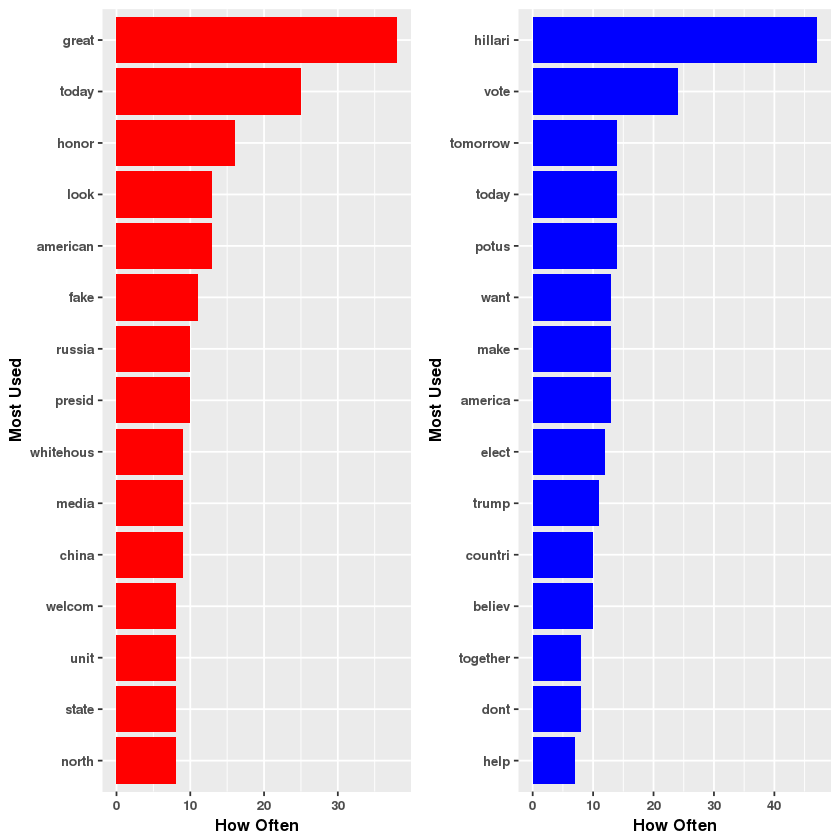

In [210]:
#There are other ways to get these plots
#side-by-side, but this is easy.
grid.arrange(trump_plot, clinton_plot, ncol=2)